In [1]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 5.1

In [239]:
# define fit A mat
def designmatpoly(X, wtvector):
    X = X[:,0]
    A_traint = np.ones(X.shape)
    #print (len(wtvector), np.shape(A_traint))    
    
    for i in range(len(wtvector)-1):
        X_row = X**(i + 1)
        A_traint = np.vstack((A_traint, X_row))         
    A_train = A_traint.T
    #print (np.shape(A_train))
    return A_train

# regularisation gradient descent function, take lamda = 1 here
def reg_gradientdescent(w, X, y, l2, core=1, rate = 0.000003, n_iterations = 700000):
    wtseq = [w]
    for iteration in range(n_iterations):
        gradients =  core*2/len(X) * X.T.dot(X.dot(w) - y) + 2 * l2 * w
        #print ('gradients',gradients)
        w = w - rate * gradients
    print ('gradients',gradients)
    return w

# squared residuals
def squared_residual(x_test, y_test, wt):
    residual = 0
    x_test = x_test[:,0]
    for i in range(len(x_test)):
        y_predi = 0
        x_testi = x_test[i]
        for wti in range(len(wt)):
            y_predi += wt[wti]*np.power(x_testi, wti)
        residual += (y_test[i] - y_predi)**2   
    #print('residual is:************ ', residual)
    return residual
# predicted value
def predict(x, wt):
    
    y_pred = []
    
    for i in range(len(x)):
        y_predi = 0
        x_i = x[i]
        for wti in range(len(wt)):
            y_predi += wt[wti]*np.power(x_i, wti)
#             print(wt[wti]*np.power(x_i, wti))
#             print('---------------------------------')
#         print('*************')
        y_pred.append(y_predi)
    print('y_pred shape',np.shape(y_pred))
    return y_pred

gradients [-0.00030202 -0.02585121  0.02294911 -0.00606791  0.00049435]
final weight  [ 0.14292884  0.15131251  0.13995498 -0.10455454  0.01240124]
y_pred shape (180, 1)
residual: 6.79167359044degree: 5


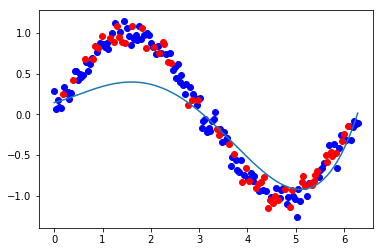

In [240]:
# prepare data 
from sklearn.model_selection import train_test_split

def f(x):
    return np.sin(x)

points = 180
X=np.linspace(0, 2*np.pi,points)
y= f(X)+np.random.normal(0,0.1,points)  # np.sqrt(np.abs(X))*
X = np.atleast_2d(X).T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
#y_train = np.expand_dims(y_train, axis=1)

# non-linear regression
plt.scatter(X_train,y_train, c='b')
plt.scatter(X_test, y_test, c='r')
for d in range(1):
    degree = d + 5
    w0 = np.random.randn(degree)
    A_train = designmatpoly(X_train, w0)
    wtfin = reg_gradientdescent(w0, A_train, y_train, 1)
    print('final weight ',wtfin)
    resid = squared_residual(X_test, y_test, wtfin)
    ypred = predict(X, wtfin)
    #print(ypred)
    plt.plot(X, ypred)
    title = 'residual: ' + str(resid) + 'degree: ' + str(degree)
    print(title)


### 5.2 

In [13]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=3, test_size=.3, random_state=0)

In [14]:
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)  

for train_index, test_index in kf.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]
